# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [28]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [29]:
def integer_spiral_numpy(n):
    A = np.zeros((n, n), dtype=int)
    nums = np.arange(1, n * n + 1)
    start=0
    end = 0
    n
    num = 0
    while start < end:
        if num < n * n:
            A[start, start:end] = nums[num:num + (end - start)]
            num += end - start
        if num < n * n:
            A[start:end, end - 1] = nums[num:num + (end - start)]
            num += end - start
        if num < n * n:
            delka = min(end - start, len(nums) - num)
            A[end - 1, start:start + delka] = nums[num:num + delka][::-1]
            num += delka
        if num < n * n and end - start - 1 > 0:
            delka = min(end - start - 1, len(nums) - num)
            A[start + 1:start + 1 + delka, start] = nums[num:num + delka][::-1]
            num += delka
        start += 1
        end -= 1
    return A
    A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [30]:
import timeit
for n in [101, 1001, 10001]:
    time1 = timeit.timeit(lambda: integer_spiral(n), number=1)
    time2 = timeit.timeit(lambda: integer_spiral_numpy(n), number=1)

    print(f"n = {n}:")
    print(f"  integer_spiral: {time1:.4f} s")
    print(f"  integer_spiral_numpy: {time2:.4f} s")

n = 101:
  integer_spiral: 0.0062 s
  integer_spiral_numpy: 0.0003 s
n = 1001:
  integer_spiral: 0.5787 s
  integer_spiral_numpy: 0.0031 s
n = 10001:
  integer_spiral: 60.5709 s
  integer_spiral_numpy: 0.3955 s


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
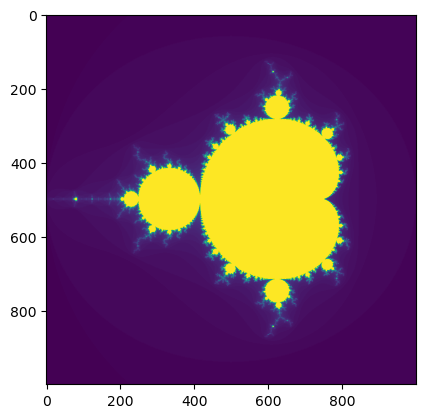

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [31]:

def mandelbrot_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=1000, k=100):
    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C, dtype=np.complex128)
    divergence_matrix = np.zeros(C.shape, dtype=int)
    for i in range(k):
        body = np.abs(Z) < 2
        Z[body] = Z[body]**2 + C[body]
        divergence_matrix[body] = i
    return divergence_matrix


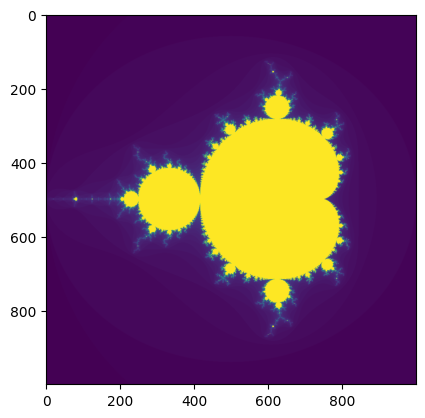

In [32]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).